In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
%matplotlib inline
df = pd.read_csv(r'~/LinkedInLearning/COVID19/data/full_dataset', header=0)
df.head()
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

In [2]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0


In [3]:
uk_df = df[(df.geoId == 'UK') | (df.geoId =='IT') | (df.geoId =='FR') | (df.geoId =='ES')]

/Users/anoop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


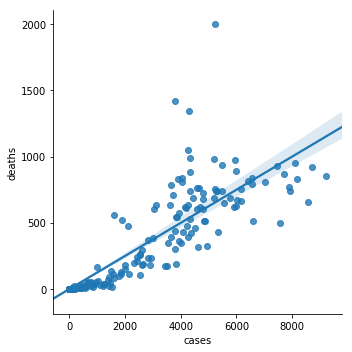

In [4]:
import seaborn as sns
sns.lmplot('cases', 'deaths', data=uk_df, fit_reg=True)

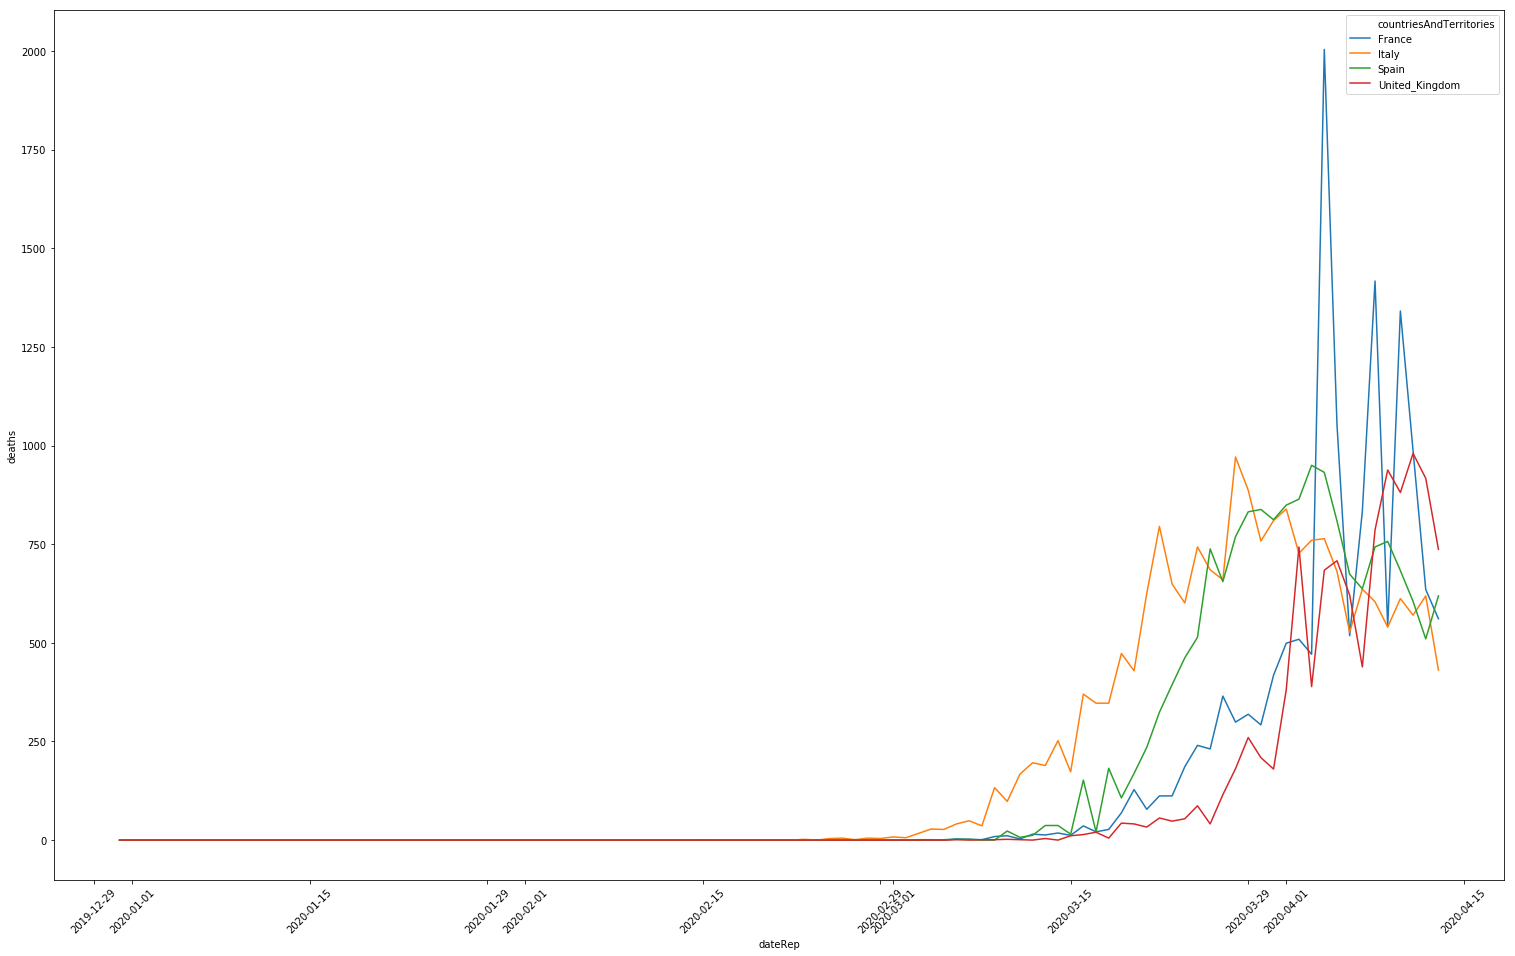

In [5]:
plt.figure(figsize=(26, 16))
plt.xticks(rotation=45)
sns.lineplot(x="dateRep", y="deaths",
             hue="countriesAndTerritories",
             data=uk_df)


In [6]:
uk_df = df[(df.geoId == 'UK')]

In [7]:
uk_df.count()

dateRep                    105
day                        105
month                      105
year                       105
cases                      105
deaths                     105
countriesAndTerritories    105
geoId                      105
countryterritoryCode       105
popData2018                105
dtype: int64

In [8]:
uk_df = uk_df[['dateRep', 'deaths']]
uk_df.head()

,dateRep,deaths
10035,2020-04-13,737
10036,2020-04-12,917
10037,2020-04-11,980
10038,2020-04-10,881
10039,2020-04-09,938


/Users/anoop/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/anoop/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/anoop/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

COVID - prediction deaths=0.399885, COVID - observed deaths=4.000000
COVID - prediction deaths=0.574727, COVID - observed deaths=0.000000
COVID - prediction deaths=3.794481, COVID - observed deaths=11.000000
COVID - prediction deaths=0.312200, COVID - observed deaths=14.000000
COVID - prediction deaths=13.557794, COVID - observed deaths=20.000000
COVID - prediction deaths=19.612650, COVID - observed deaths=5.000000
COVID - prediction deaths=12.964501, COVID - observed deaths=43.000000
COVID - prediction deaths=6.471683, COVID - observed deaths=41.000000
COVID - prediction deaths=42.565895, COVID - observed deaths=33.000000
COVID - prediction deaths=36.814362, COVID - observed deaths=56.000000
COVID - prediction deaths=45.822272, COVID - observed deaths=48.000000
COVID - prediction deaths=52.587515, COVID - observed deaths=54.000000
COVID - prediction deaths=52.119007, COVID - observed deaths=87.000000
COVID - prediction deaths=75.365996, COVID - observed deaths=41.000000
COVID - predic

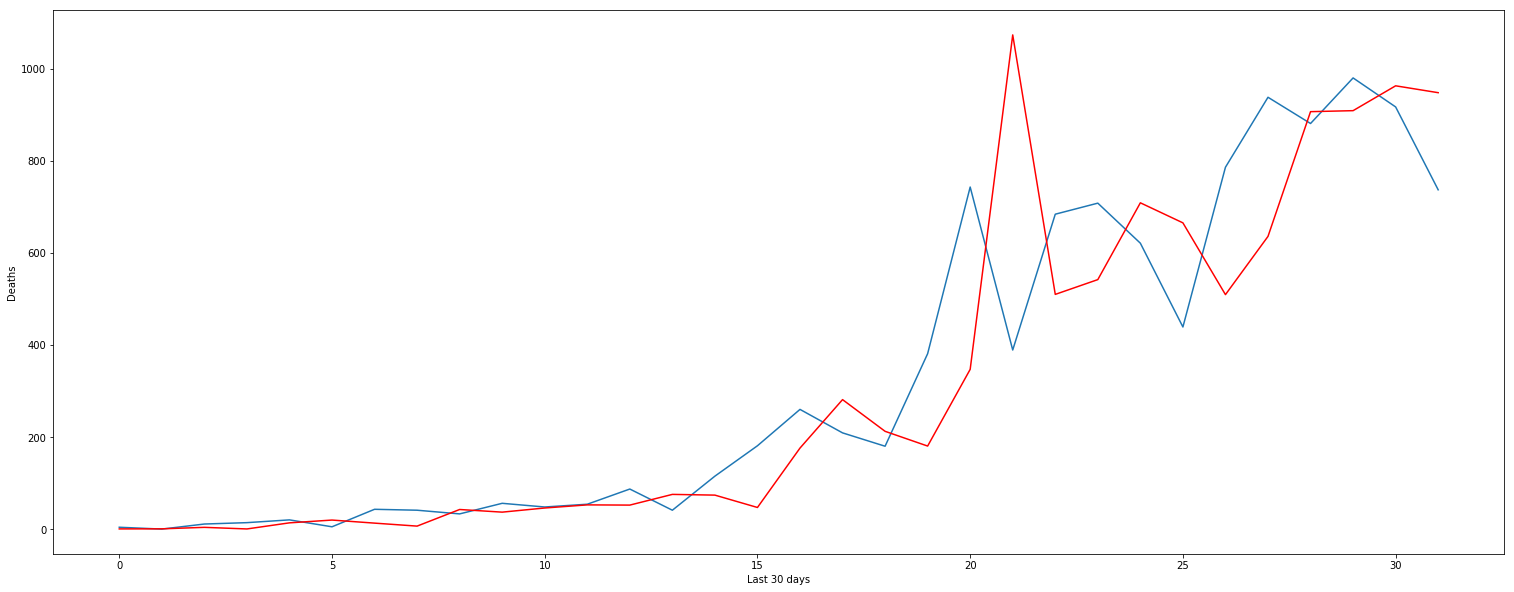

In [9]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y')

df = pd.read_csv(r'~/LinkedInLearning/COVID19/data/full_dataset', header=0, squeeze=True, infer_datetime_format=True, parse_dates=[0], index_col=[0], date_parser=parser)
df = df[df.geoId =='UK']
df.head()
df = df.sort_values(by='dateRep', ascending=True)
X = df.deaths.values

size = int(len(X) * .70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('COVID - prediction deaths=%f, COVID - observed deaths=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(26,10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.xlabel('Last 30 days')
pyplot.ylabel('Deaths')
pyplot.show()

In [42]:
df = df[df.geoId =='UK']
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=87
Testing data set length=18


In [43]:
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,MONTH,DAY_OF_WEEK,DAY
dateRep,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,United_Kingdom,UK,GBR,66488991.0,12,1,31
2020-01-01,1,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0,1,2,1
2020-01-02,2,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0,1,3,2
2020-01-03,3,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0,1,4,3
2020-01-04,4,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0,1,5,4


In [44]:
expr = """deaths ~ day  + month + year + cases"""

In [45]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [46]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [47]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                   87
Model:                            GLM   Df Residuals:                       82
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -554.14
Date:                Mon, 13 Apr 2020   Deviance:                       916.15
Time:                        20:41:34   Pearson chi2:                     856.
No. Iterations:                    25   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.35e+05   4.42e+07     -0.003      0.998   -8.67e+07    8.64e+07
day            0.1134      0.003     34.760      0.0

In [48]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                   mean      mean_se  mean_ci_lower  mean_ci_upper
dateRep                                                           
2020-01-03     0.000654     0.000985       0.000034       0.012548
2020-01-07     0.001029     0.001558       0.000053       0.020009
2020-01-13     0.002033     0.003179       0.000095       0.043580
2020-01-17     0.003200     0.005025       0.000147       0.069494
2020-01-25     0.007930     0.012560       0.000356       0.176796
2020-02-01     0.048931     0.074742       0.002451       0.976759
2020-02-03     0.061394     0.091485       0.003309       1.139016
2020-02-09     0.121260     0.186914       0.005911       2.487662
2020-02-10     0.135832     0.217676       0.005874       3.141120
2020-02-11     0.152125     0.228879       0.007971       2.903170
2020-02-18     0.336627     0.517407       0.016551       6.846593
2020-02-22     0.529934     0.818428       0.025682      10.934884
2020-02-28     1.046594     1.586043       0.053683      20.40

<Figure size 432x288 with 0 Axes>

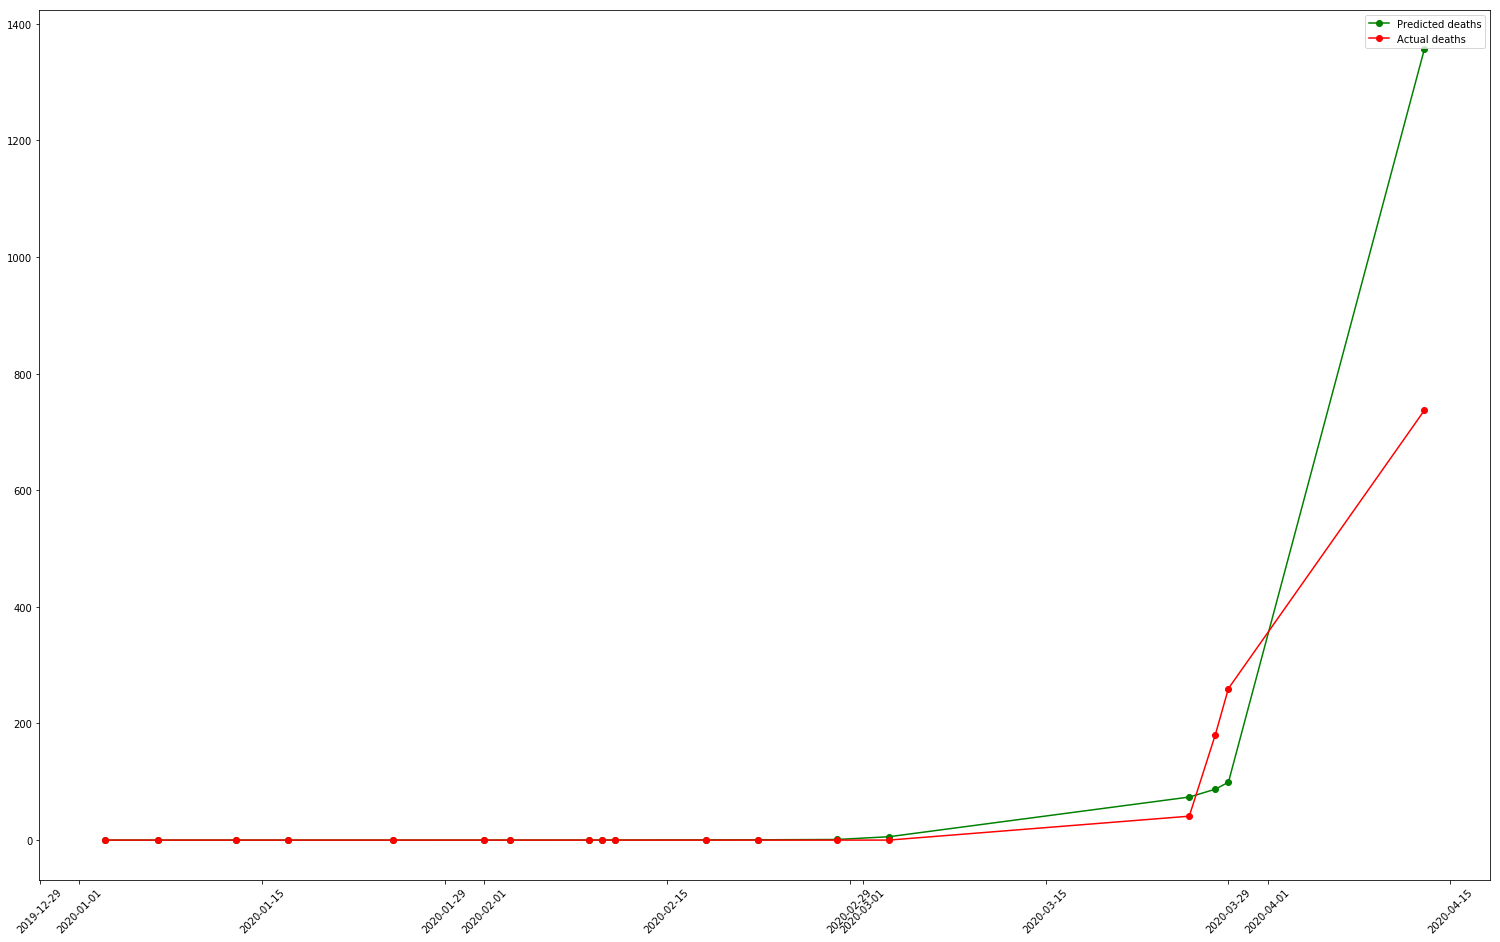

In [49]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['deaths']
fig = plt.figure()
plt.figure(figsize=(26, 16))
plt.xticks(rotation=45)
fig.suptitle('Predicted versus actual deaths in the UK')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted deaths')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual deaths')
plt.legend(handles=[predicted, actual])
plt.show()